# Health data on PDF

The Department of Health releases annually a report titled **Philippine Health Statistics.** This is a compendium of health-related data that can be useful. It has tons of **tables and charts** from population to mortality rates, all with **historical data**, except that they are in **PDF.** 

This makes analysis kind of tedious and time-consuming (especially for journalists). The code, which uses **camelot** and **pandas** libraries should help you navigate with that and save them into a friendlier **CSV** format.

Source: https://doh.gov.ph/publications/serials

In [2]:
import pandas as pd
import camelot

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Read through the file using Camelot

Download first the PDF to your computer and place it in a folder visible to your Jupyter Notebook.

We read through the file using Camelot. Doing so allows us to select the pages we want to transform to a **data frame** later on. Remember that Camelot only works on **tables**.

In [3]:
tables = camelot.read_pdf('health.pdf', pages='26-27', flavor='stream')

In [4]:
tables

<TableList n=2>

# Population data

Page 26

Now we use pandas.

In [5]:
df_pop = tables[0].df
df_pop

,0,1,2,3,4,5,6
0,,,Estimated Population,,,Percent*,
1,Age Group,,,,,,
2,,Male,Female,Both Sexes,Male,Female,Both Sexes
3,All Ages,"54,201,305","53,086,845","107,288,150",50.5,49.5,100.0
4,Under 1 yr.,"1,094,357","1,022,188","2,116,545",1.0,1.0,2.0
5,1 - 4 yr.,"4,594,298","4,319,307","8,913,605",4.3,4.0,8.3
6,5 - 9 yrs.,"5,695,661","5,358,878","11,054,539",5.3,5.0,10.3
7,10 - 14 yrs.,"5,530,663","5,220,178","10,750,841",5.2,4.9,10.0
8,15 - 19 yrs.,"5,270,955","5,054,786","10,325,741",4.9,4.7,9.6
9,20 - 24 yrs.,"4,960,167","4,756,219","9,716,386",4.6,4.4,9.1


# Cleaning the data

### Remove unnecessary rows, columns

In [6]:
df_pop.columns = df_pop.iloc[2]
df_pop = df_pop.drop(labels=[0,1,2,3,22], axis=0)

### Rename columns

In [7]:
df_pop.columns = df_pop.columns.str.lower()
df_pop.columns = df_pop.columns.str.replace(" ", "_")
df_pop.columns = ['age_group', 'male', 'female', 'both_sexes', 'male_pct', 'female_pct', 'sex_pct']
df_pop

,age_group,male,female,both_sexes,male_pct,female_pct,sex_pct
4,Under 1 yr.,"1,094,357","1,022,188","2,116,545",1.0,1.0,2.0
5,1 - 4 yr.,"4,594,298","4,319,307","8,913,605",4.3,4.0,8.3
6,5 - 9 yrs.,"5,695,661","5,358,878","11,054,539",5.3,5.0,10.3
7,10 - 14 yrs.,"5,530,663","5,220,178","10,750,841",5.2,4.9,10.0
8,15 - 19 yrs.,"5,270,955","5,054,786","10,325,741",4.9,4.7,9.6
9,20 - 24 yrs.,"4,960,167","4,756,219","9,716,386",4.6,4.4,9.1
10,25 - 29 yrs.,"4,577,286","4,370,198","8,947,484",4.3,4.1,8.3
11,30 - 34 yrs.,"4,142,232","3,970,910","8,113,142",3.9,3.7,7.6
12,35 - 39 yrs.,"3,693,552","3,561,647","7,255,199",3.4,3.3,6.8
13,40 - 44 yrs.,"3,212,507","3,111,609","6,324,116",3.0,2.9,5.9


### Change file types

You would want to change all the numbers to **float** from **object** so you can do math on them.

In [8]:
df_pop.dtypes

age_group     object
male          object
female        object
both_sexes    object
male_pct      object
female_pct    object
sex_pct       object
dtype: object

In [9]:
df_pop.male = df_pop.male.str.replace(",", "").astype(float)
df_pop.female = df_pop.female.str.replace(",", "").astype(float)
df_pop.both_sexes = df_pop.both_sexes.str.replace(",", "").astype(float)
df_pop.female_pct = df_pop.female_pct.astype(float)
df_pop.male_pct = df_pop.male_pct.astype(float)
df_pop.sex_pct = df_pop.sex_pct.astype(float)

In [10]:
df_pop.dtypes

age_group      object
male          float64
female        float64
both_sexes    float64
male_pct      float64
female_pct    float64
sex_pct       float64
dtype: object

In [28]:
df_pop = df_pop.set_index('age_group')
df_pop

,male,female,both_sexes,male_pct,female_pct,sex_pct
age_group,,,,,,
Under 1 yr.,1094357.0,1022188.0,2116545.0,1.0,1.0,2.0
1 - 4 yr.,4594298.0,4319307.0,8913605.0,4.3,4.0,8.3
5 - 9 yrs.,5695661.0,5358878.0,11054539.0,5.3,5.0,10.3
10 - 14 yrs.,5530663.0,5220178.0,10750841.0,5.2,4.9,10.0
15 - 19 yrs.,5270955.0,5054786.0,10325741.0,4.9,4.7,9.6
20 - 24 yrs.,4960167.0,4756219.0,9716386.0,4.6,4.4,9.1
25 - 29 yrs.,4577286.0,4370198.0,8947484.0,4.3,4.1,8.3
30 - 34 yrs.,4142232.0,3970910.0,8113142.0,3.9,3.7,7.6
35 - 39 yrs.,3693552.0,3561647.0,7255199.0,3.4,3.3,6.8


# Check if data tallies

### Percentage of population

In [29]:
df_pop.female_pct.sum()

49.6

Interpretation: 49.6% of the Philippine population identify themselves as females.

In [30]:
df_pop.male_pct.sum()

50.6

In [31]:
df_pop.sex_pct.sum()

100.0

<AxesSubplot:xlabel='age_group'>

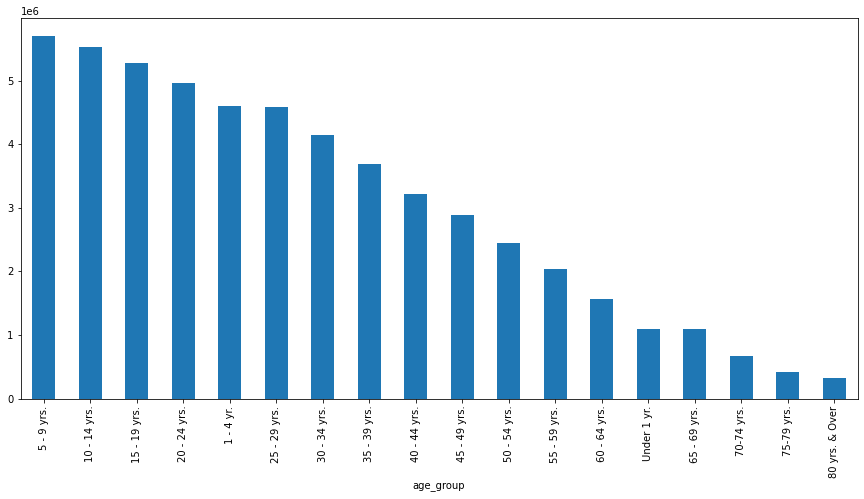

In [41]:
df_pop.male.sort_values(ascending=False).plot(kind='bar', figsize = (15, 7))

In [44]:
df_mort = tables[1].df
df_mort

,0,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,Maternal,,Fetal,
1,,Livebirths,,Total Deaths,,Infant Deaths,,,,,
2,Year,,,,,,,Deaths,,Deaths,
3,,Number,Rate*,Number,Rate*,Number,Rate**,Number,Rate**,,Number Ratio**
4,2019,"1,673,923",15.6,"620,414",5.8,"21,723",13.0,"1,458",0.9,"9,083",5.4
5,2018,"1,668,120",15.8,"590,709",5.6,"21,019",12.6,"1,616",1.0,"8,594",5.2
6,2017,"1,700,618",16.2,"579,237",5.5,"20,311",11.9,"1,484",0.9,"7,709",4.5
7,2016,"1,731,289",16.7,"582,183",5.6,"21,874",12.6,"1,483",0.9,"8,020",4.6
8,2015,"1,744,767",17.3,"560,605",5.6,"20,750",11.9,"1,721",1.0,"7,676",4.4
9,2014,"1,748,857",17.5,"536,999",5.4,"21,108",12.1,"1,570",0.9,"7,664",4.4
